In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

2021-07-16 11:49:39.874874: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


## Load Dataset

In [2]:
datamining_dir = "./"

X_train = np.load(datamining_dir + "train_X.npy")
X_test = np.load(datamining_dir + "test_X.npy")
y_train = np.load(datamining_dir + "train_Y.npy")
y_test = np.load(datamining_dir + "test_Y.npy")

X_train_imgs = np.stack((X_train, X_train, X_train), axis=3)
X_test_imgs = np.stack((X_test, X_test, X_test), axis=3)


print("X_train shape ", X_train_imgs.shape)
print("y_train shape ", y_train.shape)
print("X_test shape ", X_test_imgs.shape)
print("y_test shape ", y_test.shape)

X_train shape  (16653, 64, 64, 3)
y_train shape  (16653,)
X_test shape  (4163, 64, 64, 3)
y_test shape  (4163,)


## Display few images

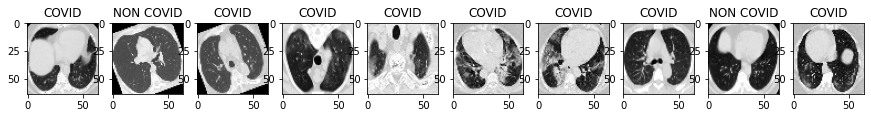

In [3]:
fig, axes = plt.subplots(1,10,figsize=(15,15))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap="gray")
    ax.set_title("COVID" if y_train[i] == 0 else "NON COVID")

## Preparing Feature Extractor Model

In [9]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model

dims = 64
resnet = ResNet50(include_top=False, input_shape=(dims, dims, 3))

for layer in resnet.layers:
    layer.trainable = False
    
model = tf.keras.layers.Flatten()(resnet.output)
model = Model(resnet.input, model)

print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
__________________________________________________________________________________________________
None


## Extracting Features via CNN (Resnet50)

In [21]:
X_train_out = model.predict(X_train_imgs)
X_test_out = model.predict(X_test_imgs)

print("X_train_out shape ", X_train_out.shape)
print("X_test_out shape ", X_test_out.shape)

X_train_out shape  (16653, 8192)
X_test_out shape  (4163, 8192)


## Fit KNN Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train_out, y_train)

acc = knn.score(X_test_out, y_test)
print("Accuracy ", acc*100)

Accuracy  89.02233965889982
